In [1]:
#Amanda Studnicki
#KMeans Algorithm 
#Note - read through some of the comments in the code for areas where I've optimized from previous coding iterations 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
import statistics
import random
import math
from skimage import io, color
from skimage import exposure 

(2336, 3504, 3)
(8185344, 3)


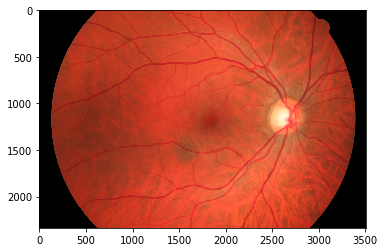

In [98]:
#read the image 
img = io.imread('01_h.jpg')
plt.imshow(img)
print(img.shape)

img_rows = img.shape[0]
img_colmns = img.shape[1]

#reshape the image
img_reshaped = img.reshape(-1,3)
print(img_reshaped.shape)

In [ ]:
#Optimization -- Before, my code included several for loops to convert the imported image into a format that 
#I could work with. This was before I knew about the "reshape" function. Using the reshape function makes my
#code run more efficiently. 

In [100]:
#MAIN SCRIPT----------------------
import time
start = time.time()
#Input parameters 
number_of_clusters = 3 #number of clusters
pixels = img_reshaped.shape[0]
features = img_reshaped.shape[1]

#generate initial random centers
initial_centroids = list(np.zeros(features))
for j in range(number_of_clusters):
    initial_centroids[j] = np.random.randn(features).astype(np.int64)

    
#define the distance function that returns the matrix of labels of what the cluster assignment is (minimizing distance) 
def distance(data,centroids):
    distance = np.zeros((pixels,number_of_clusters))
    for i in range(number_of_clusters):
        centroids_long = np.ones((pixels,features))*centroids[i]
        distance[:,i] = np.sum((np.subtract(img_reshaped,centroids_long))**2,axis=1) #don't need to sqrt because comparing the squared distances 
    min_distance = np.zeros((pixels,1))
    distance_list = np.array(distance).tolist()
    for i in range(pixels):
        min_distance[i] = np.array(distance[i]).tolist().index(min(distance[i]))
    return min_distance 

#NOTE - I optimized my distance function by decreasing the number of for-loops. This was accomplished by creating 
#a large matrix of centroids, so I only had to loop over the number of centroids. 

x=0
centroids = initial_centroids #initialize the centroids as the random initial centroids 
while x<5: 
    label = distance(img_reshaped,centroids)
    #find new centroids
    new_centroids = np.zeros((number_of_clusters,features))
    for j in range(number_of_clusters):
        data_clustered = np.zeros((pixels,features))
        for i in range(pixels):
            if label[i] == j:
                data_clustered[i,:] = img_reshaped[i,:]
        new_centroids[j,:] = np.mean(data_clustered,axis=0)
        
    centroids = new_centroids
    x=x+1

#if the label is a certain cluster, then assign the features from the "centroids" to the feature of the new image 
new_img = np.zeros((pixels,features))
colors = np.array([[0,0,205],[50,205,50],[225,20,147]])
for j in range(number_of_clusters):
    for i in range(pixels):
        if label[i] == j:
            new_img[i,:] = colors[j,:]
        

end = time.time()
print('time elapsed: ', end - start)

time elapsed:  389.1105468273163


(2336, 3504, 3)
(2336, 3504, 3)


array([[1.13189012e-01, 1.28049475e-01, 2.65049337e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.65191646e+02, 5.79427807e+01, 3.50269616e+01]])

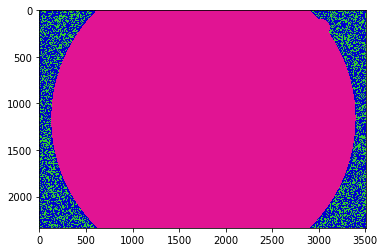

In [101]:
#reshape the image
new_img = new_img.reshape(img_rows,img_colmns,-1)
new_img = new_img.astype(np.int64)
print(img.shape)
print(new_img.shape)
plt.imshow(new_img)
centroids

#Again, I optimized the re-shaping back into the original image format 

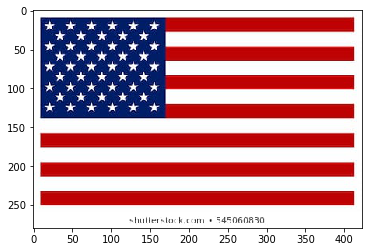

In [96]:
plt.imshow(img)
#example of a good clustering. This is the original american flag 

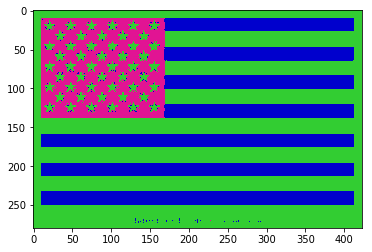

In [97]:
plt.imshow(new_img)
#This is the segmented american flag (3 clusters). 
#time elapsed:  6.293214321136475 

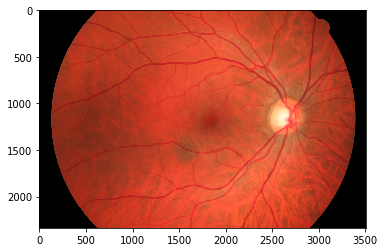

In [91]:
plt.imshow(img)
#example of a bad clustering. This is the original healthy eye image 

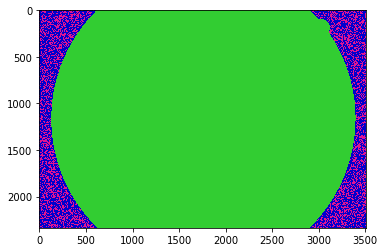

In [92]:
plt.imshow(new_img)
#This is the segmented eye image (3 clusters).
#time elapsed:  340.52327847480774

In [5]:
#calculating DICE coefficient 
k=3 #number of clusters

# segmentation
seg = new_img

# ground truth
gt = img 

dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))

print('Dice similarity score is {}',format(dice))

NameError: name 'new_img' is not defined